# Máximo Drawdown en simulaciones de Montecarlo

In [2]:
from yfinance import download
import matplotlib.pyplot as plt
import pandas as pd

### Para este ejemplo descargaremos la serie de precios de un valor y lo usaremos de base para los calculos

In [27]:
symbol = 'MSFT'

In [28]:
data = download(symbol, auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


### Tomamos el precio de cierre ajustado desde 2015 y calculamos los retornos

In [4]:
equity = data['Close']['2015':]
returns = equity.pct_change().dropna()

### Generamos 1000 simulaciones en base a mezclar aleatoriamente el orden de los retornos históricos reales

In [29]:
n_muestras = 1000
mc = []
for n in range(n_muestras):
    mc += [returns.sample(frac=1).reset_index(drop=True).to_frame(f'sim_{n}')]

mc = pd.concat(mc, 1)
mc.index = returns.index
mc.loc[equity.index[0]] = [0] * mc.shape[1]
mc = mc.sort_index()

mc_equity = mc.add(1).cumprod()
mc_equity['Real'] = equity.div(equity.iloc[0])

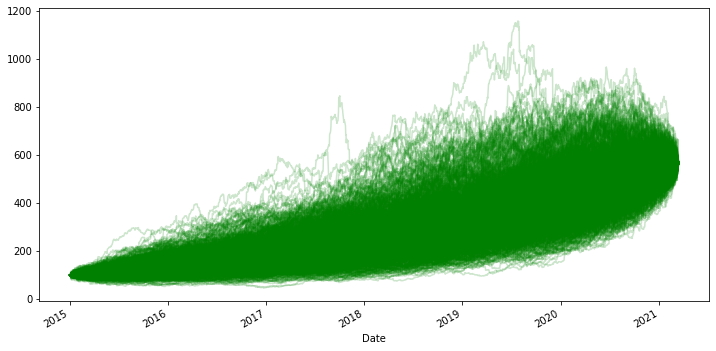

In [30]:
mc_equity.mul(100).plot(figsize=(12,6), legend=False, alpha=.2, c='g');

### Calculmos el drawdown para todas las series simuladas y la real

In [23]:
mc_dd = mc_equity.div(mc_equity.cummax()).sub(1)

### Comparamos el DD de la serie de precios reales con el mayor DD de las simulaciones

In [31]:
max_dd_id = mc_dd.min().idxmin()
print('Máximo Dradown Real')
print(f'Real :  {mc_dd["Real"].min():.2%}')
print('Máximo Dradown de Montecarlo')
print(f'{max_dd_id} :  {mc_dd.min().min():.2%}')

Máximo Dradown Real
Real :  -28.04%
Máximo Dradown de Montecarlo
sim_658 :  -64.03%


###  Visualizamos la serie simulada con mayor DD y así como los puntos de máximo DD y el máximo histórico previo

In [25]:
max_dd_date = mc_dd[max_dd_id].idxmin()
max_date = mc_equity[max_dd_id][:max_dd_date].idxmax()

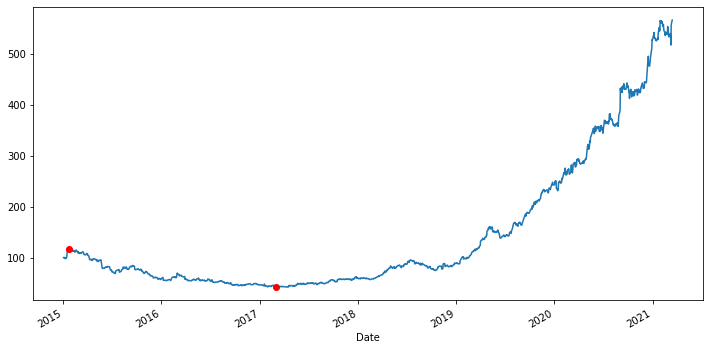

In [26]:
mc_equity[max_dd_id].mul(100).plot(figsize=(12,6), )
plt.plot(max_dd_date, mc_equity.loc[max_dd_date, max_dd_id] * 100, 'o', color='r')
plt.plot(max_date, mc_equity.loc[max_date, max_dd_id] * 100, 'o', color='r');